In [50]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data = pd.read_csv("./data/city_data.csv")
ride_data = pd.read_csv("./data/ride_data.csv")

# Read the City and Ride Data
city_data.head()

# Combine the data into a single dataset
city_ride = pd.merge(ride_data , city_data, how='left' ,on = 'city')

# Display the data table for preview
city_ride.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [51]:
city_ride['type'].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [52]:
bubble1 = city_ride.groupby(['city','type','driver_count']).agg({'fare':'mean',
                                                               'ride_id':'count'}).reset_index()
bubble1.head(10)

,city,type,driver_count,fare,ride_id
0,Amandaburgh,Urban,12,24.641667,18
1,Barajasview,Urban,26,25.332273,22
2,Barronchester,Suburban,11,36.422500,16
3,Bethanyland,Suburban,22,32.956111,18
4,Bradshawfurt,Rural,7,40.064000,10
5,Brandonfort,Suburban,10,35.437368,19
6,Carriemouth,Urban,52,28.314444,27
7,Christopherfurt,Urban,41,24.501852,27
8,Colemanland,Suburban,23,30.894545,22
9,Davidfurt,Suburban,23,31.995882,17


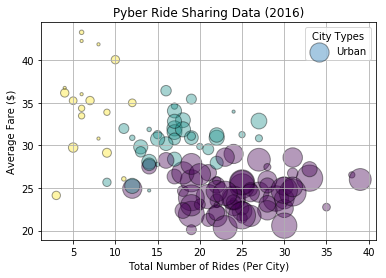

In [62]:
y = bubble1['fare']
x = bubble1['ride_id']
s = bubble1['driver_count']


colors = ['Gold', 'Light Sky Blue', 'Light Coral']

plt.scatter(x,y,s*10,alpha=0.4,edgecolors = "black",c = pd.factorize(bubble1['type'])[0])
t = c

plt.legend(t,title = "City Types")
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
plt.show()



Observations

There is a correlation between the area and the number of rides. In Urban areas the amount of rides per driver is significantly higher than the amount of rides in Rural areas. This imbalance is partially compensated by the avrage fare a driver charges in the rural areas. This amount is doubled compared to what a fare costs in Urban areas.

It is evident from the bubble and pie charts that the amount of drivers is significantly higher in Urban areas (>80%). The opportunity a driver has to get sufficient rides in Rural areas is much lower (~5%)

Suburban areas have about a quarter of the financial activity although only 12.5% of the drivers are working on those areas.

In [22]:
print(c)

['Urban' 'Suburban' 'Rural']


## Bubble Plot of Ride Sharing Data

In [6]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


## Total Fares by City Type

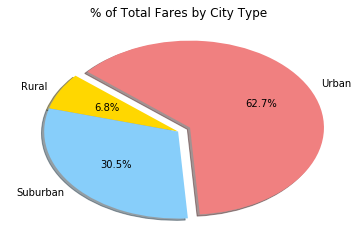

In [55]:
# Calculate Type Percents
pie1 = city_ride.groupby(['type']).agg({'fare':'sum'}).reset_index()

# Build Pie Chart
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.1)
plt.title("% of Total Fares by City Type")
#pie1.dtypes

plt.pie(pie1['fare'], explode=explode, labels=pie1['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle = 140)
#plt.axis("equal")
plt.show()
# Save Figure


## Total Rides by City Type

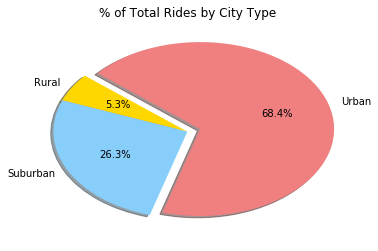

In [56]:
# Calculate Type Percents
pie2 = city_ride.groupby(['type']).agg({'ride_id':'count'}).reset_index()

# Build Pie Chart
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.1)
plt.title("% of Total Rides by City Type")
#pie1.dtypes

plt.pie(pie2['ride_id'], explode=explode, labels=pie2['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle = 140)
#plt.axis("equal")
plt.show()
# Save Figure

## Total Drivers by City Type

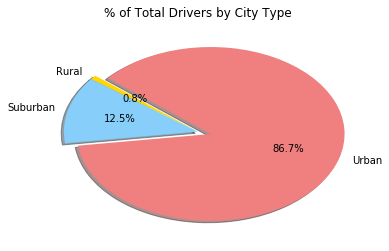

In [57]:
# Calculate Type Percents
pie3 = city_ride.groupby(['type']).agg({'driver_count':'sum'}).reset_index()

# Build Pie Chart
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.1)
plt.title("% of Total Drivers by City Type")
#pie1.dtypes

plt.pie(pie3['driver_count'], explode=explode, labels=pie3['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle = 140)
#plt.axis("equal")
plt.show()
# Save Figure

In [143]:
pie3

,type,driver_count
0,Rural,537
1,Suburban,8570
2,Urban,59602
